In [2]:
#Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets

In [3]:
#Importing the dataset using pandas
ufos = pd.read_csv('ufo-scrubbed-geocoded-time-standardized-00.csv', 
                  names=["date", "city", "state", "country", 
                        "shape", "duration_seconds", "duration", 
                        "comment", "report_date", "latitude", "longitude"], 
                  parse_dates = ["date", "report_date"]) # tell pandas that these columns are dates

In [4]:
ufos

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,2013-09-30,36.165833,-86.784444
80328,2013-09-09 22:00:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-30,43.613611,-116.202500
80329,2013-09-09 22:00:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,2013-09-30,38.297222,-122.284444
80330,2013-09-09 22:20:00,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-30,38.901111,-77.265556


In [5]:
ufos.describe() #checking out the statistics

,duration_seconds,latitude,longitude
count,8.033200e+04,80332.000000,80332.000000
mean,9.016889e+03,38.124416,-86.772885
std,6.202168e+05,10.469585,39.697205
min,1.000000e-03,-82.862752,-176.658056
25%,3.000000e+01,34.134722,-112.073333
50%,1.800000e+02,39.411111,-87.903611
75%,6.000000e+02,42.788333,-78.755000
max,9.783600e+07,72.700000,178.441900


In [6]:
ufos.columns #checking out the columns

Index(['date', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration', 'comment', 'report_date', 'latitude', 'longitude'],
      dtype='object')

This is a huge dataset and takes a lot of time to load, hence we will be generating random data points to limit the size of the data we are working on.

In [7]:
#shortlisting random 1000 numbers between 1 and length of the dataset
nsamples = 1000
downsample = np.random.choice(range(len(ufos)-1), nsamples, replace=False)

In [8]:
downsample

array([26127, 79455, 53634, 39793, 77711,  3301, 55151, 74928, 72047,
       49409, 75920, 29219, 50167, 32295,  1281, 48113, 10242, 18413,
       32118, 17069, 67253, 74072, 16476, 58024, 63202, 24060, 27532,
       16020, 47271, 74526, 18474, 12062, 31625, 73866, 23594, 74441,
       46403, 41028,  1066, 64961, 43056, 46759, 27997,  6198, 15782,
       66457, 45888, 46185, 33565, 56593, 52976, 16570, 58510, 21699,
       67673,   586, 39330, 27107, 38340, 80154, 21565, 26288, 35976,
       40825, 34332, 38928, 74851,  9620,  1299, 17034, 10579, 44072,
       11267, 55007, 10463,  7534,  7459, 70400, 67415, 10961, 65839,
       27413, 63024, 80297, 54001, 23953, 37227, 62937, 16226, 26436,
       48559, 22533, 46574, 41122,  8390, 79793, 35762, 32169,  7186,
       35320, 27255, 64447, 13876, 33070, 58389, 61152, 69963, 40931,
       29057, 50485, 63401, 13813, 26871,  8465,  5807, 34802,  1426,
       47178, 29571, 29492, 37792, 75684,  1040, 48202, 68971, 67581,
       46883, 62972,

In [9]:
ufo_final = ufos.loc[downsample] #getting data by only taking the locations we got from the above step

In [10]:
ufo_final

,date,city,state,country,shape,duration_seconds,duration,comment,report_date,latitude,longitude
26127,2008-02-12 21:40:00,massillon,oh,us,NaN,1.0,1 sec each,Blue flashes of light,2008-02-14,40.796667,-81.521667
79455,2013-09-05 09:50:00,susanville,ca,us,cigar,300.0,4-5 minutes,It turned sideways while still moving in the s...,2013-09-09,40.416389,-120.651944
53634,2004-06-05 15:00:00,cloud croft,nm,NaN,unknown,30.0,30 seconds,mysterious object chased,2006-02-14,34.519940,-105.870090
39793,2013-04-29 22:00:00,viola,ks,us,cross,300.0,~5 minutes,Gold&#44 yellowish light&#44 extremely loud&#4...,2013-05-15,37.483056,-97.643611
77711,2012-09-25 20:00:00,starksboro,vt,us,other,20.0,about 20 seconds,There was a huge object in the sky with blinki...,2012-10-30,44.227222,-73.057778
...,...,...,...,...,...,...,...,...,...,...,...
52281,2005-06-28 23:30:00,gila bend,az,us,disk,900.0,15 minutes,shocking unbelievable,2005-09-02,32.947778,-112.716111
26645,2000-02-15 21:00:00,new canaan,ct,us,unknown,60.0,1 min,Saw a large dark object 50 ft across hovering ...,2002-06-12,41.146667,-73.495278
24246,2013-01-31 05:30:00,nixburg,al,us,sphere,300.0,3-5+- minutes,I saw 1 very white/bright sphere slowly moving...,2013-02-04,32.827778,-86.111111
45788,2012-05-05 20:20:00,tucson,az,us,fireball,300.0,5 mins,Walked outside to see super moon &amp; saw 1 f...,2012-05-13,32.221667,-110.925833


In [11]:
#to replace Nans with a placeholder unknown in our dataset.
ufo_final = ufo_final.fillna({'country':'unknown', 'state': 'unknown', 'shape':'unknown'})

##Part 1- I will be creating 2 lists- 1 for X-axis and another one for Y-axis fields. I will take X-axis as categorical variables and y-axis as numerical variables and we will have dynamic plots for each combination of x and y variables.

In [12]:
#creating two lists - 1 for x-axis fields and 2nd for y-axis fields
#Will make user choose from two drop downs, one for x-axis from one list and second for y-axis from the other list
x_cols = ufo_final[['date','report_date','state','city','country','duration']]
y_cols = ufo_final[['latitude','longitude','duration_seconds']]

In [13]:
#Here I am creating two dropdowns. one for choosing a field for X axis and other for the Y axis.
#Then I will directly pass them to function make_plot which will then plot the scatter plot.
#Here I passed all the columns to kind of check what fields so that I can get an idea about which fields to choose.
@ipywidgets.interact(x1=x_cols,y1=y_cols)
def make_plot(x1,y1):
    ufo_final.plot(x = x1, y=y1, figsize=(20,10),kind = 'scatter')
    plt.show()

interactive(children=(Dropdown(description='x1', options=('date', 'report_date', 'state', 'city', 'country', '…

This is our final plot that takes all categorical values in the X-axis and numerical variables in the y-axis to create an interactive plot altogether.

For part 1 of the assignment.I have also tried one more way of plotting numerical variable duration seconds against categorical variable country here. Hope this understanding is correct as well.

In [14]:
#another way of trying to plot country vs duration seconds 
def make_buildings_plot(country,duration_s):
    with plt.style.context('ggplot'):
        #plt.plot(a, label='Country') # note "years" gets passed by default in the index
        #plt.plot(ufosDS['duration_seconds'], label='Duration')
        plt.plot(ufo_final["country"].astype(str), ufo_final["duration_seconds"],'.', ms=20)
        plt.plot(country,duration_s,'.', ms=20)
        plt.xlabel('Country')
        plt.ylabel('Duration')
        plt.legend()
        plt.show()

In [15]:
#defining dropdown for country and duration in seconds 
feature1_drop = ipywidgets.Dropdown(options=ufo_final['country'].unique())
feature2_drop = ipywidgets.Dropdown(options=ufo_final['duration_seconds'])

In [16]:
#linking our plot function with the dropdown values
out = ipywidgets.interactive_output(make_buildings_plot, {'country': feature1_drop, 'duration_s':feature2_drop})

In [17]:
#diplaying the graph
out

Output(outputs=({'output_type': 'stream', 'text': 'No handles with labels found to put in legend.\n', 'name': …

In [18]:
#Aligning our widgest horizontally for user to choose country and duration_seconds 
ipywidgets.VBox([ipywidgets.HBox([feature1_drop, feature2_drop]), out])

With change in country value and duration_seconds, I can see the blue dot in our graph varying and pointing out different values in the graph.

##part 2- Giving user to choose colormap for their plot.

In [24]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [25]:
#checking out the list of available colormaps 
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

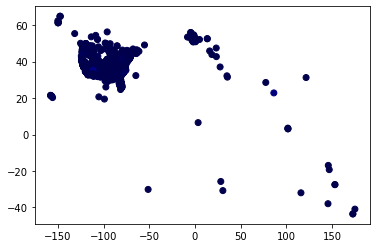

In [26]:
#Tried out a simple scatter plot of latitude v/s longitude and applied the 'magma' color map
#I will make the 'cmap' parameter interactive
plt.scatter(ufo_final['longitude'],ufo_final['latitude'], 
            c=ufo_final['duration_seconds'], cmap='seismic')
plt.show()

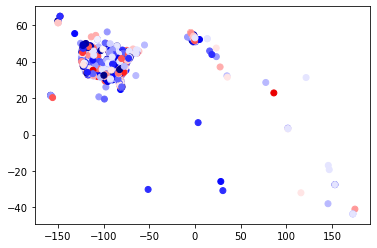

In [27]:
#resetting using logscale for clearer results.
plt.scatter(ufo_final['longitude'],ufo_final['latitude'], 
            c=np.log10(ufo_final['duration_seconds']), cmap='seismic')
plt.show()

##Now we will try to create an interactive plot here by using ipywidgets -interact function 

In [30]:
@ipywidgets.interact(colormap_name=plt.colormaps())
def ufo_plot(colormap_name):
    plt.scatter(ufo_final['longitude'],ufo_final['latitude'],c=np.log10(ufo_final['duration_seconds']), cmap=colormap_name)
    plt.colorbar()
    plt.show()

interactive(children=(Dropdown(description='colormap_name', options=('magma', 'inferno', 'plasma', 'viridis', …

We used the log scale here to adjust our axis with a better scale. We gave user an option to change colormaps as per his own choice above.

In [31]:
#part 3- Histogram plots in interactive style

In [32]:
#Let us use histogram concept to make an interactive plot now.
#Here duration_seconds will remain constant, and user will choose which field to bin from the dropdown.
#asking for  usier input - C for Categorical columns and N for Numerical columns
choose=input("Enter C for categorical variable and N for Numerical variable")
if choose=='C': #If user selected categorical columns
    @ipywidgets.interact(choose_cat_col=['shape','state','country','city'], choose_num_col=['latitude','longitude']) #----List of categorical columns to choose from
    def plot_bar(choose_cat_col,choose_num_col):
        fig, ax = plt.subplots(1,1,figsize=(20,10))
        plt.scatter(ufo_final[choose_cat_col],(ufo_final[choose_num_col])) #--to plot atleast one numeric column and one categorical column
        plt.show()
#If user selected numerical Columns,we will go in the else loop.
else:
    @ipywidgets.interact(choose_bins=range(5,300),cols=['longitude','latitude']) #Numerical values that we are allowing user to select
#Providing a bin range from 5-300 for user to choose or change the bin number size according to what suits users' needs.
    def make_plot(cols,choose_bins):
        ufo_final.hist(column=cols,bins=int(choose_bins),figsize=(15,10))
        plt.show()

Enter C for categorical variable and N for Numerical variableC


interactive(children=(Dropdown(description='choose_cat_col', options=('shape', 'state', 'country', 'city'), va…

Here I have tried covering both scenarios -the first where user chooses atleast one categorical variable against a numerical column and the second scenario where we give user an option to select simply numerical column with changeable bin size. I have used the input function to take user function and then used IF ELSE to create user -based customizations in the plots covering either one of the scenarios.The city value in the categorical column is hard to aggregate as it has a lot of values and harder to visualize, however I have still added it as an option in our visualization.